## EEG

In [23]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import mne

# task = 'nback'
# task = 'wg'
task = 'dsr'
path = 'D:\One_한양대학교\private object minsu\coding\data\EEG_fnirs_cognitive_open\datasetB'
subj = 1
data = loadmat(f'{path}/EEG/VP0{subj:02}-EEG/cnt_{task}.mat')
event = loadmat(f'{path}/EEG/VP0{subj:02}-EEG/mrk_{task}.mat')

In [24]:
np.where(event[f'mrk_{task}'][0][0]['event'][0][0][0] == 48)[0], len(np.where(event[f'mrk_{task}'][0][0]['event'][0][0][0] == 48)[0])

(array([  0,  21,  42,  63,  84, 105, 126, 147, 168, 189, 210, 231, 252,
        273, 294, 315, 336, 357], dtype=int64),
 18)

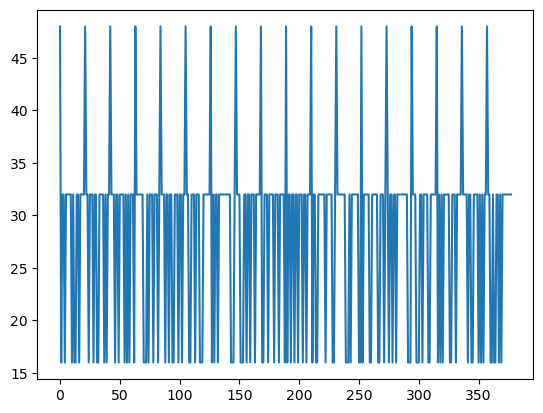

In [25]:
plt.plot(event[f'mrk_{task}'][0][0]['event'][0][0][0])
plt.show()

In [26]:
i = 0
eeg = np.array(data[f'cnt_{task}'][0][0]['x'].T, float)
eeg = mne.io.RawArray(eeg, mne.create_info([data[f'cnt_{task}'][0][0]['clab'][0][m][0] for m in range(30)], 200, ['eeg']*28+['eog']*2))
events = event[f'mrk_{task}'][0][0]['time'][0]//5
labels = event[f'mrk_{task}'][0][0]['y'][0]
eeg

Creating RawArray with float64 data, n_channels=30, n_times=268135
    Range : 0 ... 268134 =      0.000 ...  1340.670 secs
Ready.


<RawArray | 30 x 268135 (1340.7 s), ~61.4 MB, data loaded>

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


C:\Users\user\AppData\Local\Temp\ipykernel_43956\1230442022.py:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg.plot_psd()
c:\Users\user\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


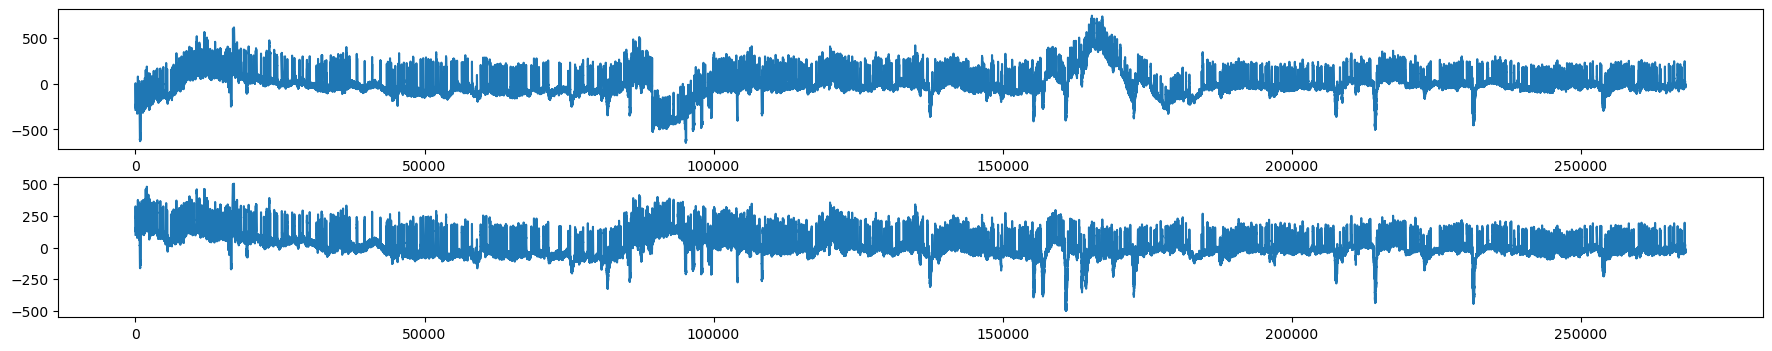

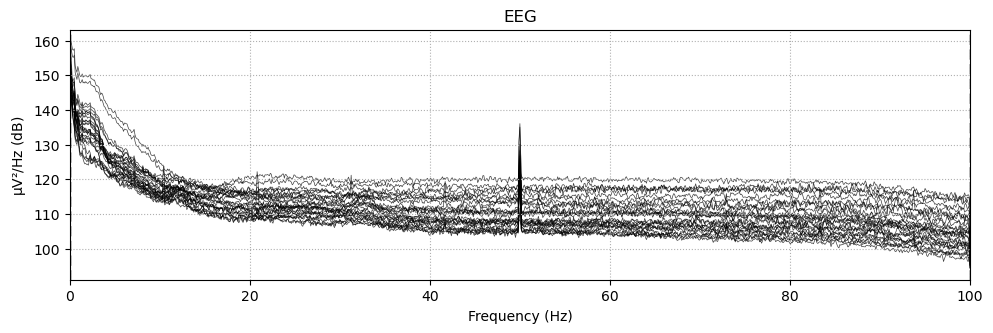

In [5]:
# Common average re-referencing
plt.figure(figsize=(22,4))
plt.subplot(211)
plt.plot(eeg['eeg'][0][0])

eeg.set_eeg_reference()

plt.subplot(212)
plt.plot(eeg['eeg'][0][0])
eeg.plot_psd()
plt.show()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.0s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


C:\Users\user\AppData\Local\Temp\ipykernel_43956\150425749.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg.plot_psd()
c:\Users\user\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


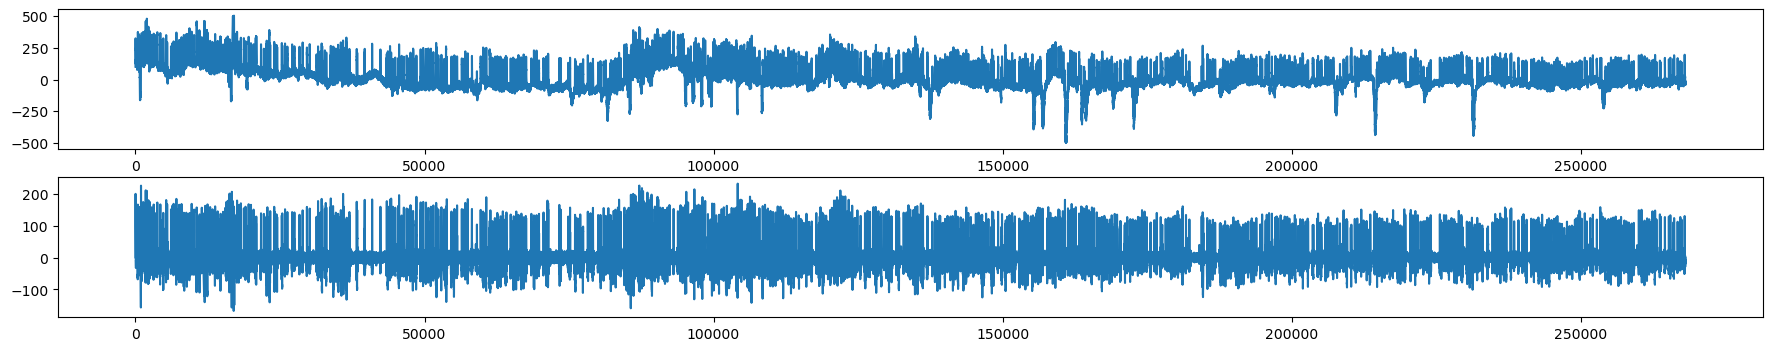

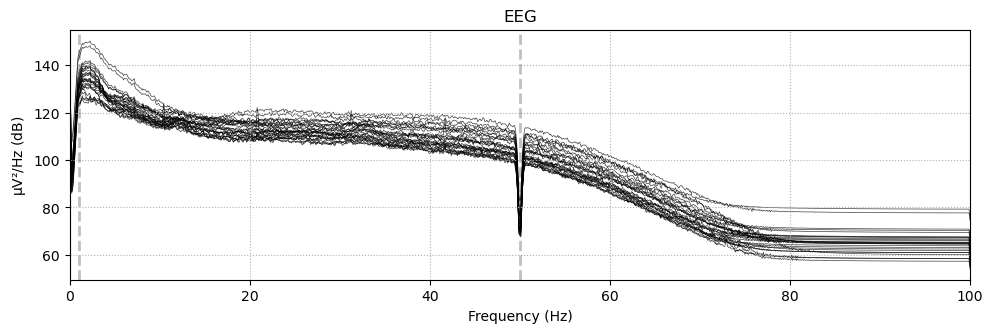

In [6]:
plt.figure(figsize=(22,4))
plt.subplot(211)
plt.plot(eeg['eeg'][0][0])

eeg.notch_filter(50)
eeg.filter(1,50, method='iir', iir_params=dict(order=3, ftype='butter'))
plt.subplot(212)
plt.plot(eeg['eeg'][0][0])
eeg.plot_psd()
plt.show()

Fitting ICA to data using 28 channels (please be patient, this may take a while)


Selecting by number: 25 components
Fitting ICA took 4.7s.
Using EOG channels: VEOG, HEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=27, n_times=268135
    Range : 0 ... 268134 =      0.000 ...  1340.670 secs
Ready.
Using matplotlib as 2D backend.


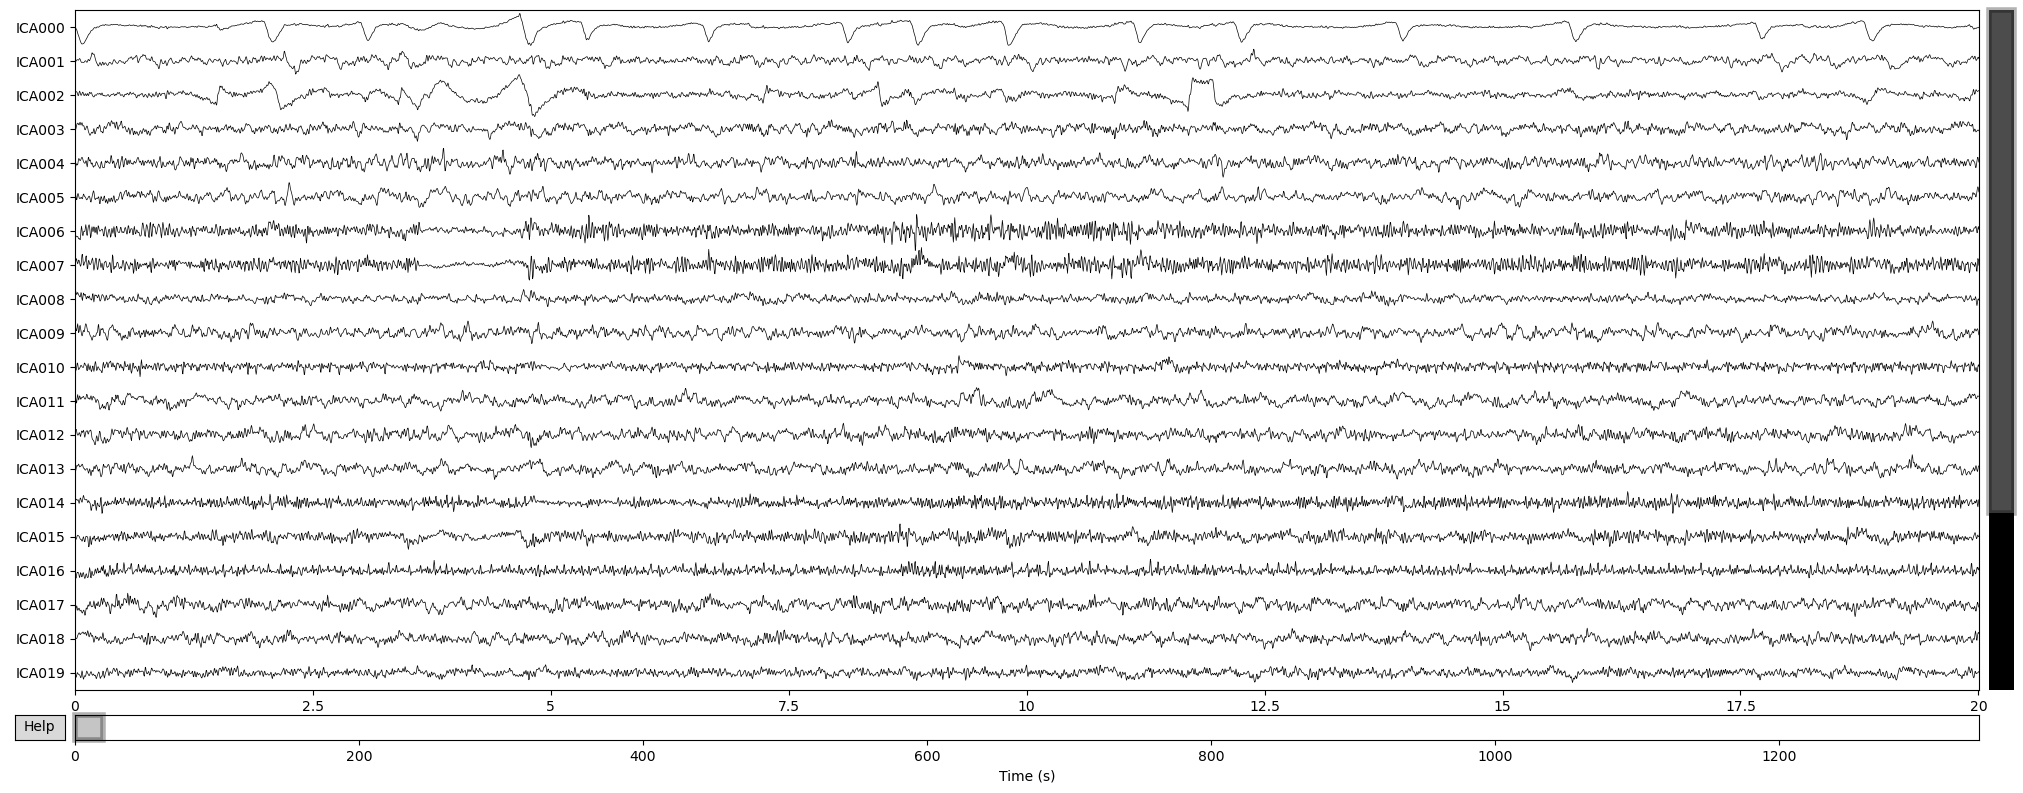

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 28 PCA components


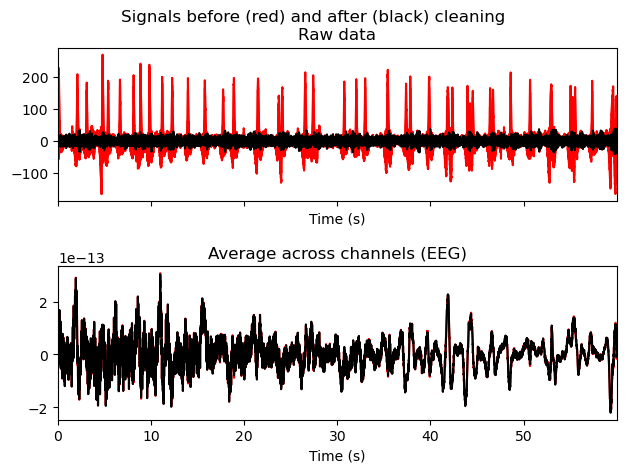

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 3 ICA components
    Projecting back using 28 PCA components



In [7]:
# ica
ica = mne.preprocessing.ICA(n_components=25, random_state=22)
ica.fit(eeg)
eog_indices, eog_scores = ica.find_bads_eog(eeg, ch_name=['VEOG', 'HEOG'])
ica.plot_sources(eeg, show_scrollbars=True)
ica.plot_overlay(eeg, exclude=eog_indices, start=200*0, stop=200*60, picks=['eeg'])
ica.exclude = eog_indices
ica.apply(eeg)

print()

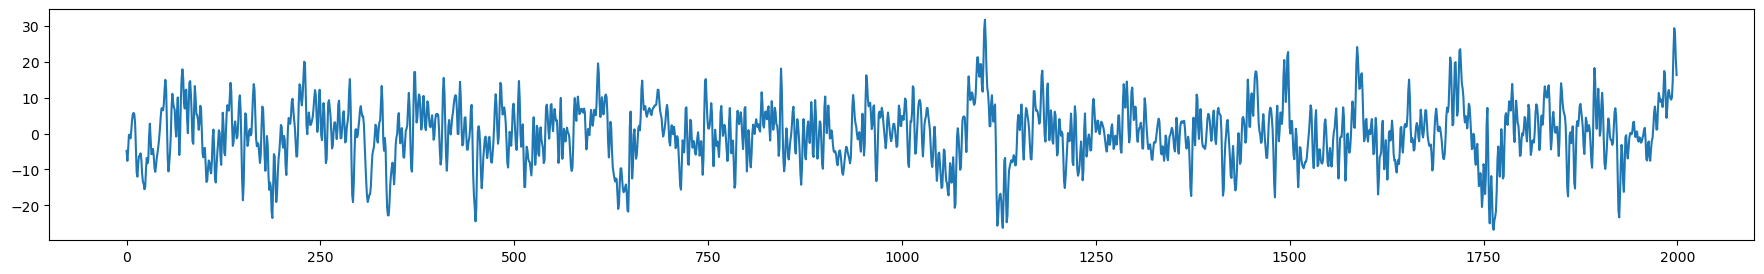

In [8]:
plt.figure(figsize=(22,3))
plt.plot(eeg._data[0,events[0]:events[0]+200*10])
plt.show()

## FNIRS

In [32]:
data = loadmat(f'{path}/NIRS/VP0{subj:02}-NIRS/cnt_{task}.mat')
event = loadmat(f'{path}/NIRS/VP0{subj:02}-NIRS/mrk_{task}.mat')

In [33]:
i = 0
eeg = np.concatenate([data[f'cnt_{task}']['oxy'][0][0]['x'][0][0].T, data[f'cnt_{task}']['deoxy'][0][0]['x'][0][0].T], dtype=float)*1e4
events = event[f'mrk_{task}'][0][0]['time'][0]//100

In [57]:
subj = 1
event = loadmat(f'{path}/EEG/VP0{subj:02}-EEG/mrk_{task}.mat')
events = event[f'mrk_{task}'][0][0]['time'][0]//5
a1 = np.array([events[m]/200 for m in np.where(event[f'mrk_{task}'][0][0]['event'][0][0][0] == 48)[0]])

event = loadmat(f'{path}/NIRS/VP0{subj:02}-NIRS/mrk_{task}.mat')
events = event[f'mrk_{task}'][0][0]['time'][0]//100
a2 = np.array([events[m]/10 for m in range(len(events))] + [0])
a2 - a1

array([   13.2  ,    13.345,    13.24 ,    13.245,    13.29 ,    13.25 ,
          65.285,    65.23 ,   134.325,   134.165,   134.125,   210.875,
         177.365,   177.21 ,   177.415,   177.28 ,   177.12 , -1268.2  ])

In [12]:
len(event[f'mrk_{task}'][0][0]['event'][0][0][0])

17

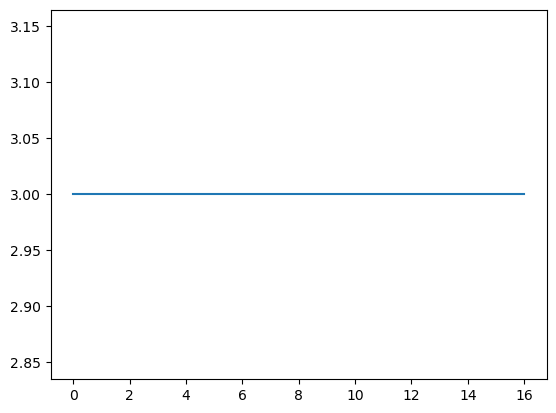

In [13]:
plt.plot(event[f'mrk_{task}'][0][0]['event'][0][0][0])
plt.show()

Setting up band-pass filter from 0.01 - 0.2 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 0.01, 0.20 Hz: -6.02, -6.02 dB



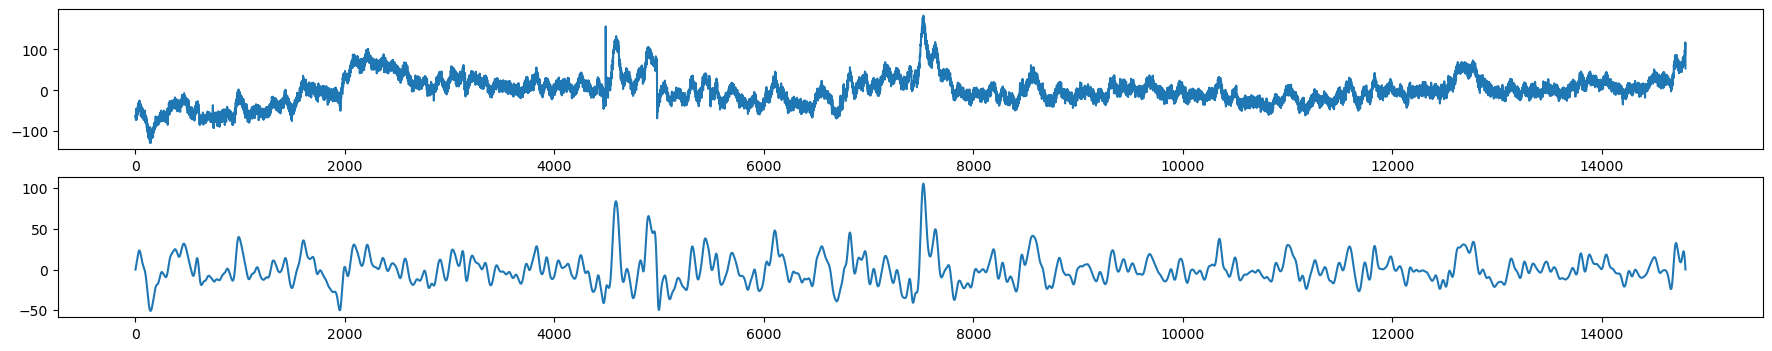

In [14]:
plt.figure(figsize=(22,4))
plt.subplot(211)
plt.plot(eeg[0])

eeg = mne.filter.filter_data(eeg, 10, 0.01, 0.2, method='iir', iir_params=dict(order=3, ftype='butter'))

plt.subplot(212)
plt.plot(eeg[0])
plt.show()